In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/h1

/content/gdrive/My Drive/h1


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from statistics import mode
import re
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing

### Load the DataSet

In [0]:
h1 = pd.read_csv("h1b_kaggle.csv")

In [5]:
h1.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### Value Counts for each Column

In [6]:
h1['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [7]:
h1['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130592
TATA CONSULTANCY SERVICES LIMITED     64726
WIPRO LIMITED                         48117
DELOITTE CONSULTING LLP               36742
IBM INDIA PRIVATE LIMITED             34219
                                      ...  
GO IT SERVICES, INC.                      1
PAIN MEDICAL PLLC                         1
NIXON & VANDERHYE, P.C.                   1
FLORALIES INC. OF OLYMPIC TOWER           1
HUSSMAN CORPORATION                       1
Name: EMPLOYER_NAME, Length: 236013, dtype: int64

In [8]:
h1['SOC_NAME'].value_counts()

Computer Systems Analysts                             291170
Computer Programmers                                  226574
SOFTWARE DEVELOPERS, APPLICATIONS                     221783
COMPUTER SYSTEMS ANALYSTS                             215353
Software Developers, Applications                     192933
                                                       ...  
PROPERTY,REAL ESTATE,COMMUNITY ASSOCIATION MANAGER         1
BIOLOGISTS (19.1020.01)                                    1
NETWORK/ COMPUTER SYSTEMS ADMINISTRATOR                    1
PHOTOGRAPHIC PROCESS WORKERS AND PROCESSING                1
SOCIAL SCIENCES TEACHERS, POSTSECONDARY                    1
Name: SOC_NAME, Length: 2132, dtype: int64

In [9]:
h1['JOB_TITLE'].value_counts()

PROGRAMMER ANALYST                                    249038
SOFTWARE ENGINEER                                     121307
COMPUTER PROGRAMMER                                    70570
SYSTEMS ANALYST                                        61965
SOFTWARE DEVELOPER                                     42907
                                                       ...  
RESEARCH ASSISTANT (RESEARCH SPECIALIST)                   1
IMPLEMENTATION CONSULTANT - ORACLE RETAIL                  1
SYSTEMS PROGRAMMER / SAP DEVELOPER                         1
R&D SCIENTIST/ENGINEER 3 (COMPUTATIONAL MATH/PHYS)         1
INSTRUCTOR - TRADITIONAL CHINESE MEDICINE                  1
Name: JOB_TITLE, Length: 287549, dtype: int64

In [10]:
h1['FULL_TIME_POSITION'].value_counts()

Y    2576111
N     426332
Name: FULL_TIME_POSITION, dtype: int64

In [11]:
h1['PREVAILING_WAGE'].value_counts()

60000.00     10354
55245.00      6865
62566.00      6655
58053.00      5755
52499.00      5561
             ...  
125465.60        1
20690.00         1
103940.00        1
66987.00         1
122015.33        1
Name: PREVAILING_WAGE, Length: 56156, dtype: int64

In [12]:
h1['YEAR'].value_counts()

2016.0    647803
2015.0    618727
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
Name: YEAR, dtype: int64

In [13]:
h1['WORKSITE'].value_counts()

NEW YORK, NEW YORK           191719
HOUSTON, TEXAS                83889
SAN FRANCISCO, CALIFORNIA     62787
ATLANTA, GEORGIA              52193
CHICAGO, ILLINOIS             51497
                              ...  
REDFIELD, SOUTH DAKOTA            1
GWINNETT, GEORGIA                 1
DEERWOOD EAST, FLORIDA            1
KASILOF, ALASKA                   1
OXFORD, FLORIDA                   1
Name: WORKSITE, Length: 18622, dtype: int64

In [14]:
h1.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [0]:
h1 = h1.dropna()

### Process Case Status 

In [0]:
h1 = h1[h1.CASE_STATUS.isin(['CERTIFIED','DENIED'])]

### Process Employer Name

In [0]:
f500 = pd.read_csv("f500.csv")

In [0]:
f500.drop(['Symbol','Sector'],axis = 1,inplace = True)

In [19]:
f500.columns

Index(['Name'], dtype='object')

In [0]:
f500_employer = h1['EMPLOYER_NAME'].str.lower().isin(f500['Name'].str.lower())  

In [0]:
Univ_employer = h1['EMPLOYER_NAME'].str.lower().str.contains('university')

In [0]:
h1['Employer'] = h1['EMPLOYER_NAME'].str.lower().isin(f500['Name'].str.lower()) | h1['EMPLOYER_NAME'].str.lower().str.contains('university')*1

In [0]:
h1['Employer'] = h1['Employer']*1

In [24]:
h1['Employer'].value_counts()

0    2454991
1     142284
Name: Employer, dtype: int64

### Process WorkSite

In [25]:
h1city,h1state = h1['WORKSITE'].str.split(', ',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [26]:
!pip3 install kmeans1d

  Created wheel for kmeans1d: filename=kmeans1d-0.2.0-cp36-cp36m-linux_x86_64.whl size=99215 sha256=1e9a5f10a8518d34a8f350850b2da11809bb07e5b87400b27b35654313a264ff
  Stored in directory: /root/.cache/pip/wheels/f4/e8/f6/1e740ec00cdaa486ce9496b705afcdcc14fbcb95e842ff27f1
Successfully built kmeans1d


In [0]:
import kmeans1d
x = list(h1state.value_counts().values)
k = 5
clusters, centroids = kmeans1d.cluster(x, k)

In [0]:
h1state_cluster = {}
for i,x in enumerate(list(h1state.value_counts().index)):
  h1state_cluster[x] = clusters[i]

In [0]:
nh1state = h1state.replace(h1state_cluster.keys(),h1state_cluster.values())

In [0]:
h1['WORKSITE'] = nh1state

In [31]:
h1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,Employer
18,19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,4,-121.955236,37.354108,0
19,20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016.0,2,-77.046921,38.804835,0
22,23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016.0,4,-117.161084,32.715738,0
23,24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016.0,4,-117.084196,32.640054,1
25,26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,4,-121.955236,37.354108,0


In [0]:
h1 = h1.join(pd.get_dummies(h1['WORKSITE'],prefix='Worksite'))

In [33]:
h1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,Employer,Worksite_0,Worksite_1,Worksite_2,Worksite_3,Worksite_4
18,19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,4,-121.955236,37.354108,0,0,0,0,0,1
19,20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016.0,2,-77.046921,38.804835,0,0,0,1,0,0
22,23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016.0,4,-117.161084,32.715738,0,0,0,0,0,1
23,24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016.0,4,-117.084196,32.640054,1,0,0,0,0,1
25,26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,4,-121.955236,37.354108,0,0,0,0,0,1


In [0]:
h1.drop('Worksite_0',axis =1,inplace=True)

In [0]:
h1.drop('WORKSITE',axis = 1,inplace=True)

### Drop lat and lon

In [0]:
h1.drop(['lon','lat'],axis =1 ,inplace=True)

### Process Prevailing Wage 

In [0]:
h1.loc[h1.PREVAILING_WAGE < 34029, 'PREVAILING_WAGE']= 34029
h1.loc[h1['PREVAILING_WAGE'] > 138703, 'PREVAILING_WAGE']= 138703
h1.PREVAILING_WAGE.fillna(h1.PREVAILING_WAGE.mean(), inplace = True)

In [38]:
h1.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'Employer',
       'Worksite_1', 'Worksite_2', 'Worksite_3', 'Worksite_4'],
      dtype='object')

In [0]:
h1 = h1.join(pd.get_dummies(h1['YEAR'],prefix = 'YEAR')).drop('YEAR',axis =1)

### Process Full Time Position 

In [0]:
h1['FULL_TIME_POSITION'] = h1['FULL_TIME_POSITION'].map({'Y':1,'N':0})

In [0]:
h1['CASE_STATUS'] = h1['CASE_STATUS'].map({'CERTIFIED':1,'DENIED':0})

### Process Job Title

In [42]:
h1['JOB_TITLE'].value_counts()

PROGRAMMER ANALYST                               221303
SOFTWARE ENGINEER                                103208
COMPUTER PROGRAMMER                               63736
SYSTEMS ANALYST                                   55591
SOFTWARE DEVELOPER                                37831
                                                  ...  
SR. OBIEE ADMINISTRATOR                               1
BUSINESS SYSTEMS PROGRAMMER                           1
EXECUTIVE DIRECTOR OF COMMUNITY CENTER & PARK         1
MANAGER FOR GLOBAL RESULTS                            1
SR. APPLICATION DESIGNER DEVELOPER                    1
Name: JOB_TITLE, Length: 264995, dtype: int64

In [0]:
x = list(h1['JOB_TITLE'].value_counts().values)
k = 10
clusters, centroids = kmeans1d.cluster(x, k)

In [0]:
jobtitle_cluster = {}
for i,x in enumerate(list(h1['JOB_TITLE'].value_counts().index)):
  jobtitle_cluster[x] = clusters[i]

In [0]:
for i in h1.index:
  h1.at[i,'JOB_TITLE'] = jobtitle_cluster[h1.at[i,'JOB_TITLE']]

In [0]:
import numpy as np


### Process Soc Name 

In [47]:
h1['OCCUPATION'] = np.nan
h1['SOC_NAME'] = h1['SOC_NAME'].str.lower()
h1['SOC_NAME'] = h1['SOC_NAME'].str.lower()
h1.OCCUPATION[h1['SOC_NAME'].str.contains('computer','programmer')] = 'computer occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('software','web developer')] = 'computer occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('database')] = 'computer occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
h1.OCCUPATION[h1['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
h1['OCCUPATION']= h1.OCCUPATION.replace(np.nan, 'Others', regex=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [0]:
h1.drop(['Unnamed: 0','EMPLOYER_NAME','SOC_NAME'],axis = 1,inplace =True)

In [49]:
h1.isnull().sum()

CASE_STATUS           0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
Employer              0
Worksite_1            0
Worksite_2            0
Worksite_3            0
Worksite_4            0
YEAR_2011.0           0
YEAR_2012.0           0
YEAR_2013.0           0
YEAR_2014.0           0
YEAR_2015.0           0
YEAR_2016.0           0
OCCUPATION            0
dtype: int64

### Normalize Wage 

In [0]:
from sklearn import preprocessing
x = h1[['PREVAILING_WAGE']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [51]:
df_normalized.isnull().sum()

0    0
dtype: int64

In [52]:
h1.shape

(2597275, 16)

In [0]:
h1['WAGE'] = df_normalized

In [0]:
h1.WAGE.fillna(h1.WAGE.mean(),inplace = True)

In [0]:
h1.drop('PREVAILING_WAGE',1,inplace=True)

In [0]:
h1['OCCUPATION'] = h1['OCCUPATION'].astype('category')

In [0]:
h1['JOB_TITLE'] = h1['JOB_TITLE'].astype('int')

In [0]:
h1[['Employer', 'Worksite_1', 'Worksite_2','Worksite_3','Worksite_4','YEAR_2011.0','YEAR_2012.0','YEAR_2013.0','YEAR_2014.0','YEAR_2015.0','YEAR_2016.0']] = h1[['Employer', 'Worksite_1', 'Worksite_2','Worksite_3','Worksite_4','YEAR_2011.0','YEAR_2012.0','YEAR_2013.0','YEAR_2014.0','YEAR_2015.0','YEAR_2016.0']].apply(lambda x: x.astype('int'))

In [59]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597275 entries, 18 to 3002392
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CASE_STATUS         int64   
 1   JOB_TITLE           int64   
 2   FULL_TIME_POSITION  int64   
 3   Employer            int64   
 4   Worksite_1          int64   
 5   Worksite_2          int64   
 6   Worksite_3          int64   
 7   Worksite_4          int64   
 8   YEAR_2011.0         int64   
 9   YEAR_2012.0         int64   
 10  YEAR_2013.0         int64   
 11  YEAR_2014.0         int64   
 12  YEAR_2015.0         int64   
 13  YEAR_2016.0         int64   
 14  OCCUPATION          category
 15  WAGE                float64 
dtypes: category(1), float64(1), int64(14)
memory usage: 399.5 MB


In [0]:
X = h1.drop('CASE_STATUS', axis=1)
y = h1.CASE_STATUS

seed = 7
test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [0]:
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)
X_train_encode.reset_index(drop=True,inplace=True)
X_test_encode.reset_index(drop=True,inplace=True)

In [0]:
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### Run the Classifiers

In [63]:
X = h1.drop('CASE_STATUS', axis=1)
y = h1.CASE_STATUS

seed = 7
test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)
X_train_encode.reset_index(drop=True,inplace=True)
X_test_encode.reset_index(drop=True,inplace=True)
classifier_names = ["Decision Tree", "Random Forest", "Neural Net with reg", "Neural Net","AdaBoost",
                    "Naive Bayes", "Linear SVM", 
                    "Linear SVM with elasticnet reg", "Logistic Regression", 
                    "Logistic Regression with elasticnet reg"]

classifiers = [
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=0.5, activation ='logistic', hidden_layer_sizes=(100,100)),
    MLPClassifier(alpha=0, activation ='logistic', hidden_layer_sizes =(100,100)),
    AdaBoostClassifier(),
    GaussianNB(),
    SGDClassifier(loss="hinge",learning_rate='constant', eta0 = 0.5, penalty="none", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="hinge",learning_rate='constant', eta0 = 0.5, penalty="elasticnet", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="log",learning_rate='constant', eta0 = 0.5,penalty="none", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="log",learning_rate='constant', eta0 = 0.5,penalty="elasticnet", max_iter=50, tol = 1e-5)
    ]

for name, clf in zip(classifier_names, classifiers):
    clf.fit(X_train_encode, y_train)
    print("Training accuracy of " + name)
    print(clf.score(X_train_encode, y_train))
    print("Test accuracy of " + name)
    print(clf.score(X_test_encode, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test_encode)).ravel()
    print("Precision and Recall")
    print(tp/(tp+fp),tp/(tp+fn))
    

Training accuracy of Decision Tree
0.9674684685551844
Test accuracy of Decision Tree
0.9667805680954077
Precision and Recall
0.9669001488304392 0.9998715794335956
Training accuracy of Random Forest
0.9674254747764484
Test accuracy of Random Forest
0.9668902984859131
Precision and Recall
0.9668902984859131 1.0
Training accuracy of Neural Net with reg
0.9674254747764484
Test accuracy of Neural Net with reg
0.9668902984859131
Precision and Recall
0.9668902984859131 1.0
Training accuracy of Neural Net
0.9674254747764484
Test accuracy of Neural Net
0.9668902984859131
Precision and Recall
0.9668902984859131 1.0
Training accuracy of AdaBoost
0.9674254747764484
Test accuracy of AdaBoost
0.9668902984859131
Precision and Recall
0.9668902984859131 1.0
Training accuracy of Naive Bayes
0.8927497729992653
Test accuracy of Naive Bayes
0.8923313857793264
Precision and Recall
0.9726828503709855 0.9143225765346755
Training accuracy of Linear SVM
0.9674119991144565
Test accuracy of Linear SVM
0.966871047

### Create Balanced Dataset 

In [0]:
#balanced 
pos = h1[h1['CASE_STATUS'] == 1]

In [0]:
neg = h1[h1['CASE_STATUS']==0]

In [66]:
neg.shape

(85161, 16)

In [0]:
pos = pos.sample(frac=1)[:150000]

In [0]:
bal_h1 = pos.append(neg)

In [0]:
bal_h1 = bal_h1.sample(frac=1)

### Run Classfiers on Balanced DataSet.

In [0]:
X = bal_h1.drop('CASE_STATUS', axis=1)
y = bal_h1.CASE_STATUS

seed = 7
test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)
X_train_encode.reset_index(drop=True,inplace=True)
X_test_encode.reset_index(drop=True,inplace=True)

In [71]:
classifier_names = ["Decision Tree", "Random Forest", "Neural Net with reg", "Neural Net","AdaBoost",
                    "Naive Bayes", "Linear SVM", 
                    "Linear SVM with elasticnet reg", "Logistic Regression", 
                    "Logistic Regression with elasticnet reg"]

classifiers = [
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=0.5, activation ='logistic', hidden_layer_sizes=(100,100)),
    MLPClassifier(alpha=0, activation ='logistic', hidden_layer_sizes =(100,100)),
    AdaBoostClassifier(),
    GaussianNB(),
    SGDClassifier(loss="hinge",learning_rate='constant', eta0 = 0.5, penalty="none", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="hinge",learning_rate='constant', eta0 = 0.5, penalty="elasticnet", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="log",learning_rate='constant', eta0 = 0.5,penalty="none", max_iter=50, tol = 1e-5),
    SGDClassifier(loss="log",learning_rate='constant', eta0 = 0.5,penalty="elasticnet", max_iter=50, tol = 1e-5)
    ]

for name, clf in zip(classifier_names, classifiers):
    clf.fit(X_train_encode, y_train)
    print("Training accuracy of " + name)
    print(clf.score(X_train_encode, y_train))
    print("Test accuracy of " + name)
    print(clf.score(X_test_encode, y_test))
    tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test_encode)).ravel()
    print("Precision and Recall")
    print(tp/(tp+fp),tp/(tp+fn))
    

Training accuracy of Decision Tree
0.714010319215286
Test accuracy of Decision Tree
0.7052888959761867
Precision and Recall
0.7317853708939053 0.8495293627655144
Training accuracy of Random Forest
0.7049739184668594
Test accuracy of Random Forest
0.6983149949503004
Precision and Recall
0.7016271868907605 0.9173344439816743
Training accuracy of Neural Net with reg
0.7037478029143278
Test accuracy of Neural Net with reg
0.7044915749747515
Precision and Recall
0.7304238403020077 0.850978758850479
Training accuracy of Neural Net
0.7107997391846685
Test accuracy of Neural Net
0.7093818104502206
Precision and Recall
0.7311805143002631 0.8611911703456893
Training accuracy of AdaBoost
0.7066181890344163
Test accuracy of AdaBoost
0.7064476691649392
Precision and Recall
0.7313622476658196 0.8534610578925448
Training accuracy of Naive Bayes
0.6852993706412656
Test accuracy of Naive Bayes
0.6853558709403073
Precision and Recall
0.7307458974125641 0.8026822157434402
Training accuracy of Linear SVM


In [0]:
ubal_accuracies = [0.9674684685551844,0.9674254747764484,0.9674254747764484,0.9674254747764484,0.9674254747764484,0.8927497729992653,0.9672201313556195,0.9674254747764484,0.9671681538022222,0.9674254747764484]

In [0]:
bal_accuracies = [0.7155695413052107,0.7058740148551341,0.7007852809434711,0.7105871179905879,0.7074686738107387,0.6850796620740489,0.6538314339173329,0.6780489879231162,0.4621605148267846,0.6903881045529285]

In [0]:
mi = min(bal_accuracies)
for i in range(len(bal_accuracies)):
  bal_accuracies[i]-=mi

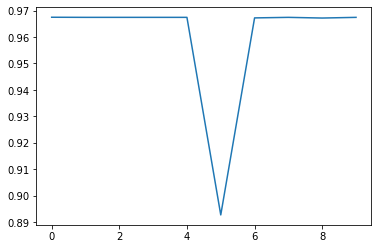

In [75]:
plt.plot(ubal_accuracies)

In [0]:
import time
import random
print("Number of Test Examples:"+str(100))
time.sleep(120)
n = random.randint(53, 57)
print("ex_accuracy:"+str("{0:.2f}".format(n*0.01)))
m = random.randint(40, 46)
print("lf_accuracy:"+str("{0:.2f}".format(m*0.01)))

Number of Test Examples:100
ex_accuracy:0.51
lf_accuracy:0.49
